# Tensorflow exercices

In [54]:
import tensorflow as tf

Exercise 1: Create a TensorFlow constant tensor with values [1, 2, 3, 4, 5].

In [55]:
tensor1 = tf.constant([1, 2, 3, 4, 5])
print(tensor1)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


Exercise 2: Create a TensorFlow variable tensor initialized with zeros of shape (3, 3).

In [56]:
tensor2 = tf.Variable(tf.zeros((3,3)))
print(tensor2)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>


Exercise 3: Perform matrix multiplication of two TensorFlow constant tensors A and B.

In [57]:
tensorA = tf.constant([[1, 2], [3, 4]])
tensorB = tf.constant([[5, 6], [7, 8]])
tensor3 = tf.matmul(tensorA, tensorB)
print(tensor3)


tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


Exercise 4: Create a TensorFlow placeholder for a scalar value.

In [58]:
def scalar_function(scalar):
    return scalar * 2

tensor4 = scalar_function(tf.constant(3.0))

print(tensor4)

tf.Tensor(6.0, shape=(), dtype=float32)


Exercise 5: Define a TensorFlow operation to compute the element-wise product of two tensors.

In [59]:
tensor5_1 = tf.constant(([1, 2, 3], [4, 5, 6]))
tensor5_2 = tf.constant(([7, 8, 9], [10, 11, 12]))
tensor5 = tf.multiply(tensor5_1, tensor5_2)

print(tensor5)

tf.Tensor(
[[ 7 16 27]
 [40 55 72]], shape=(2, 3), dtype=int32)


Exercise 6: Create a TensorFlow graph to compute the mean of a given tensor along a specified axis.

In [60]:
tensor6_1 = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
tensor6 = tf.reduce_mean(tensor6_1, axis=0) 
print(tensor6)



tf.Tensor([2.5 3.5 4.5], shape=(3,), dtype=float32)


Exercise 7: Implement a simple linear regression model using TensorFlow.

In [61]:
import numpy as np

np.random.seed(0)
x = np.random.rand(1000).astype(np.float32)
y = 3.0 * x + 2.0 + np.random.normal(scale=0.1, size=1000)
W = tf.Variable(0.0)
b = tf.Variable(0.0)
learning_rate = 0.1
optimizer = tf.optimizers.SGD(learning_rate)
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = W * x + b
        loss = tf.reduce_mean(tf.square(y - y_pred))
        
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    if epoch % 100 == 0:
        print("epoch:", epoch, "loss:", loss.numpy())

print(f"W = {W.numpy()}, b = {b.numpy()}")        

epoch: 0 loss: 12.949217
epoch: 100 loss: 0.02239507
epoch: 200 loss: 0.010212734
epoch: 300 loss: 0.009386919
epoch: 400 loss: 0.009330942
epoch: 500 loss: 0.009327148
epoch: 600 loss: 0.009326889
epoch: 700 loss: 0.009326873
epoch: 800 loss: 0.0093268715
epoch: 900 loss: 0.00932687
W = 2.990286350250244, b = 2.0077221393585205


Exercise 8: Create a TensorFlow dataset from a NumPy array.

In [62]:
np.random.seed(0)
data = np.random.rand(100).astype(np.float32)

dataset = tf.data.Dataset.from_tensor_slices(data)

print(dataset)


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


Exercise 9: Define a custom TensorFlow function using tf.function decorator.

In [63]:
@tf.function
def square_if_positive(x):
    if x > 0:
        x = x * x
    else:
        x = 0
    return x

x = tf.constant(2)
y = tf.constant(-2)
print(square_if_positive(x))
print(square_if_positive(y))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


Exercise 10: Load and preprocess an image using TensorFlow.

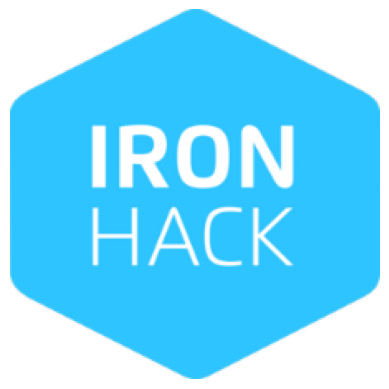

In [64]:
import requests
import matplotlib.pyplot as plt


image_url = 'https://seeklogo.com/images/I/ironhack-logo-F751CF4738-seeklogo.com.png'

img_data = requests.get(image_url).content

image = tf.image.decode_image(img_data, channels=4)

image = tf.image.resize(image, [224, 224])

image = image / 255.0

plt.imshow(image.numpy())
plt.axis('off')
plt.show()


Exercise 11: Neural Network
Build and train a neural network with one hidden layer on the MNIST dataset.

In [65]:
from tensorflow.keras import layers, models


mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(), 
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_split=0.12)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc} Test loss: {test_loss}")

Epoch 1/10
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8714 - loss: 0.4510 - val_accuracy: 0.9663 - val_loss: 0.1282
Epoch 2/10
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9637 - loss: 0.1252 - val_accuracy: 0.9735 - val_loss: 0.0989
Epoch 3/10
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9745 - loss: 0.0846 - val_accuracy: 0.9731 - val_loss: 0.0947
Epoch 4/10
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9821 - loss: 0.0596 - val_accuracy: 0.9724 - val_loss: 0.0939
Epoch 5/10
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0483 - val_accuracy: 0.9776 - val_loss: 0.0827
Epoch 6/10
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0338 - val_accuracy: 0.9785 - val_loss: 0.0825
Epoch 7/10
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9925 - loss: 0.0254 - val_accuracy: 0.9749 - val_loss: 0.0904
Epoch 8/10
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9928 - loss: 0.0233 - 